In [1]:
%pylab inline
import astropy.units as u
import tmm
from LSSTFringe import utils,plot_utils,TMMSIM
from tqdm import tqdm
from numba import jit
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plot_utils.init_plot_style()

# By default, TS temperature is about 90 degeree
index_of_refraction = utils.load_refraction_data(Epoxy_ind=1.6,Temp = 173.)
index_of_refraction2 = utils.load_refraction_data(Epoxy_ind=1.6,Temp = 300.)

Populating the interactive namespace from numpy and matplotlib


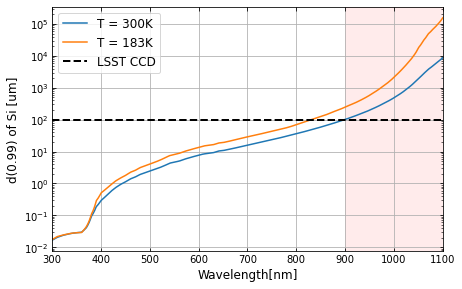

In [2]:
wlen = np.linspace(300., 1100., 4000)
si_n_list_300 = [index_of_refraction2['Si_Temp'](w) for w in wlen]
si_n_list_183 = [index_of_refraction['Si_Temp'](w) for w in wlen]



ab_length_si_300 = 4*np.pi*np.imag(si_n_list_300)/wlen
ab_length_si_183 = 4*np.pi*np.imag(si_n_list_183)/wlen
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.figure(figsize = (7,4.5))
plt.plot(wlen,1/(ab_length_si_300*1e3)*3,label = 'T = 300K')
plt.plot(wlen,1/(ab_length_si_183*1e3)*3,label = 'T = 183K')
plt.axhline(100,linestyle = '--',color = 'black',linewidth = 2,label = 'LSST CCD')
#plt.axhline(14,linestyle = '--',color = 'black',linewidth = 1.5,label = 'ACS HRC CCD')


plt.axvspan(900,1100,color= 'red',alpha = 0.08)
#plt.vspan(300,600)
plt.xlim(300,1100)
plt.yscale('log')
plt.ylabel('d(0.99) of Si [um]',fontsize = 12)
plt.xlabel('Wavelength[nm]',fontsize = 12)
plt.grid()

plt.legend(loc = 'best',fontsize = 12)